<a href="https://colab.research.google.com/github/jepeto22/project-2/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing of the CIFAR-10 dataset images

## 1. Loading the dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


## 2. Defining the number of output classes (Labels) and input shape to be used in the models

In [3]:
num_classes = 10
input_shape = (32, 32, 3)

class_mapper = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}


## 3. Converting labels to one-hot encoded form

In [4]:
# convert labels to one-hot encoded form
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## 4. Normalizing the input data

In [5]:
# normalize color of images (255)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

## 5. Data visualization

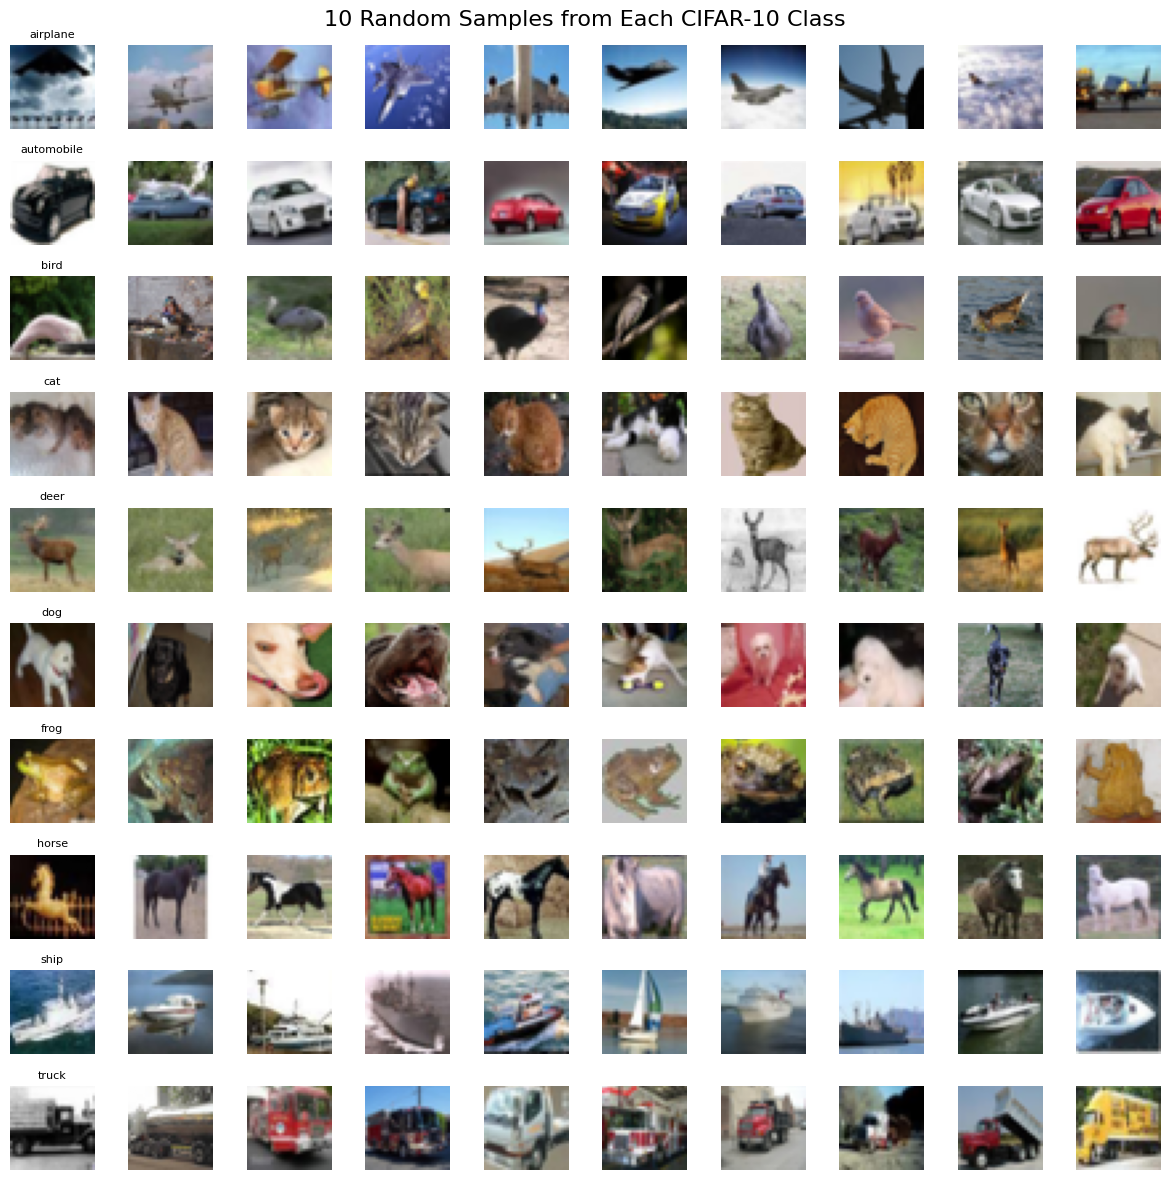

In [8]:
# Plot 10x10 images (10 per class)
samples_per_class = 10
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.suptitle("10 Random Samples from Each CIFAR-10 Class", fontsize=16)

for class_id in range(10):
    idxs = np.where(np.argmax(y_train, axis=1) == class_id) [0]

    selected = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(selected):
        ax = axes[class_id, i]
        ax.imshow(x_train[idx])
        ax.axis('off')
        if i == 0:
            ax.set_title(class_mapper[class_id], fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## 6. Augmentation

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

augmentation_layers = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2)
])

# Model creation

In [10]:
# First we will clear the keras session
from keras.backend import clear_session
clear_session()


In [16]:
# We will start with a basic model:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

model_1 = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        augmentation_layers,
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(10, activation="softmax"),
     ]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Defining batch size and nº of epochs and compiling the model using the defined parameters:

batch_size = 512
epochs = 50

model_1.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])




In [ ]:
# Fitting the model:
history_model_1 = model_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluating the model:
score_model_1 = model_1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_model_1[0])
print("Test accuracy:", score_model_1[1])

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 39s 425ms/step - accuracy: 0.1372 - loss: 2.2881 - val_accuracy: 0.2312 - val_loss: 2.2001
Epoch 2/50
24/88 ━━━━━━━━━━━━━━━━━━━━ 24s 383ms/step - accuracy: 0.2292 - loss: 2.2079